In [1]:
import requests
page = requests.get("https://www.worldometers.info/coronavirus")

In [2]:
page.status_code

200

b'\n<!DOCTYPE html>\n<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->\n<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->\n<!--[if !IE]><!-->\n<html lang="en">\n<!--<![endif]-->\n<head>\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="viewport" content="width=device-width, initial-scale=1">\n<title>Coronavirus Update (Live): 2,917,353 Cases and 203,111 Deaths from COVID-19 Virus Pandemic - Worldometer</title>\n<meta name="description" content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates">\n\n<link rel="shortcut icon" href="/favicon/favicon.ico" type="image/x-icon">\n<link rel="apple-touch-icon" sizes="57x57" href="/favicon/apple-icon-57x57.png">\n<link r
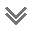

In [3]:
page.content

In [4]:
#importing the BeautifulSoup library
from bs4 import BeautifulSoup

In [5]:
#Instatiating the BeautifulSoup Class
soup = BeautifulSoup(page.content, 'lxml')
#Where soup is a variable containing the HTML of the webpage

<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->
<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->
<!--[if !IE]><!-->
<html lang="en">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <title>
   Coronavirus Update (Live): 2,917,353 Cases and 203,111 Deaths from COVID-19 Virus Pandemic - Worldometer
  </title>
  <meta content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates" name="description"/>
  <link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
  <link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/
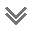

In [6]:
#Lets formatt it nicely, using the prettify method as contrasts as cell 3
print(soup.prettify())

In [7]:
# Search for the table and extracting it
table = soup.find('table', attrs={'id': 'main_table_countries_today'})

In [8]:
table

<table class="table table-bordered table-hover main_table_countries" id="main_table_countries_today" style="width:100%;margin-top: 0px !important;">
<thead>
<tr>
<th width="100">Country,<br/>Other</th>
<th width="20">Total<br/>Cases</th>
<th width="30">New<br/>Cases</th>
<th width="30">Total<br/>Deaths</th>
<th width="30">New<br/>Deaths</th>
<th width="30">Total<br/>Recovered</th>
<th width="30">Active<br/>Cases</th>
<th width="30">Serious,<br/>Critical</th>
<th width="30">Tot Cases/<br/>1M pop</th>
<th width="30">Deaths/<br/>1M pop</th>
<th width="30">Total<br/>Tests</th>
<th width="30">Tests/<br/>
<nobr>1M pop</nobr>
</th>
<th style="display:none" width="30">Continent</th>
</tr>
</thead>
<tbody>
<tr class="total_row_world row_continent" data-continent="North America" style="display: none">
<td style="text-align:left;">
<nobr>North America</nobr>
</td>
<td>1,033,506</td>
<td>+37,169</td>
<td>58,571</td>
<td>+2,376</td>
<td>142,312</td>
<td>832,623</td>
<td>16,361</td>
<td></td>
<td></

In [9]:
rows = table.find_all("tr", attrs={"style": ""})

In [10]:
data = []
for i,item in enumerate(rows):
    
    if i == 0:
        
        data.append(item.text.strip().split("\n")[:13])
        
    else:
        data.append(item.text.strip().split("\n")[:12])

In [11]:
data

[['Country,Other',
  'TotalCases',
  'NewCases',
  'TotalDeaths',
  'NewDeaths',
  'TotalRecovered',
  'ActiveCases',
  'Serious,Critical',
  'Tot\xa0Cases/1M pop',
  'Deaths/1M pop',
  'TotalTests',
  'Tests/',
  '1M pop'],
 ['World',
  '2,917,353',
  '+88,527',
  '203,111',
  '+6,012',
  '834,525',
  '1,879,717',
  '58,178',
  '374',
  '26.1',
  '',
  ''],
 ['USA',
  '959,143',
  '+33,911',
  '54,228 ',
  '+2,035',
  '116,201',
  '788,714',
  '15,110',
  '2,898',
  '164',
  '5,279,237',
  '15,949'],
 ['Spain',
  '223,759',
  '+3,995',
  '22,902 ',
  '+378',
  '95,708',
  '105,149',
  '7,705',
  '4,786',
  '490',
  '930,230',
  '19,896'],
 ['Italy',
  '195,351',
  '+2,357',
  '26,384 ',
  '+415',
  '63,120',
  '105,847',
  '2,102',
  '3,231',
  '436',
  '1,707,743',
  '28,245'],
 ['France',
  '161,488',
  '+1,660',
  '22,614 ',
  '+369',
  '44,594',
  '94,280',
  '4,725',
  '2,474',
  '346',
  '463,662',
  '7,103'],
 ['Germany',
  '156,418',
  '+1,419',
  '5,873 ',
  '+113',
  '109,80

In [12]:
# to suppress future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import dask.dataframe as dd

dt = pd.DataFrame(data)
dt = pd.DataFrame(data[1:], columns=data[0][:12]) #Formatting the header
df = dd.from_pandas(dt,npartitions=1)

In [13]:
df.head()

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/
0,World,"2,917,353","+88,527","203,111","+6,012","834,525","1,879,717","58,178",374,26.1,,
1,USA,"959,143","+33,911","54,228","+2,035","116,201","788,714","15,110","2,898",164,"5,279,237","15,949"
2,Spain,"223,759","+3,995","22,902",+378,"95,708","105,149","7,705","4,786",490,"930,230","19,896"
3,Italy,"195,351","+2,357","26,384",+415,"63,120","105,847","2,102","3,231",436,"1,707,743","28,245"
4,France,"161,488","+1,660","22,614",+369,"44,594","94,280","4,725","2,474",346,"463,662","7,103"


In [14]:
df.to_csv('../Extracted_data/data-*.csv')

['../Extracted_data/data-0.csv']